In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=document.cookie.match(/(

In [3]:
from html.parser import HTMLParser

# Define a subclass of HTMLParser called MyHTMLParser
class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    # Override the parent class's handle_starttag method
    def handle_starttag(self, tag, attrs):
        # If the tag is a script or style tag, set the script attribute to True
        if tag.lower() in ["script","style"]:
            self.script = True

    # Override the parent class's handle_endtag method
    def handle_endtag(self, tag):
        # If the tag is a script or style tag, set the script attribute to False
        if tag.lower() in ["script","style"]:
            self.script = False

    # Override the parent class's handle_data method
    def handle_data(self, data):
        # If the text data is empty or the script attribute is True, do nothing
        if str.strip(data)=="" or self.script:
            return
        # Otherwise, append the text to the res attribute, with any occurrences of "[ edit ]" removed and surrounded by a space
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Jump to content Toggle sidebar Search Create account Log in Personal tools Create account Log in 
			Pages for logged out editors  learn more Talk Contributions Navigation Main page Contents Current events Random article About Wikipedia Contact us Donate Contribute Help Learn to edit Community portal Recent changes Upload file Tools What links here Related changes Upload file Special pages Permanent link Page information Cite this page Wikidata item Print/export Download as PDF Printable version In other projects Wikimedia Commons Wikiversity Languages On this Wikipedia the language links are at the top of the page across from the article title.  Go to top . Contents move to sidebar hide (Top) 1 Foundations 1.1 Relationship to statistics 2 Etymology 2.1 Early usage 2.2 Modern usage 3 See also 4 References 
						Toggle the table of contents
					 Data science 44 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Espera

In [4]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data science', 3.9107142857142856),
 ('information science', 3.9107142857142856),
 ('computer science', 3.9107142857142856),
 ('^ davenport', 3.8),
 ('data analysis', 3.666666666666667),
 ('science', 1.9107142857142858),
 ('wikipedia', 1.4),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('thomas', 1.2),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

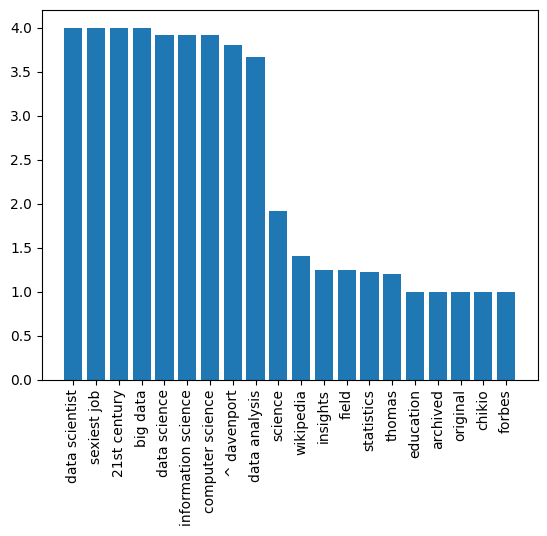

In [11]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

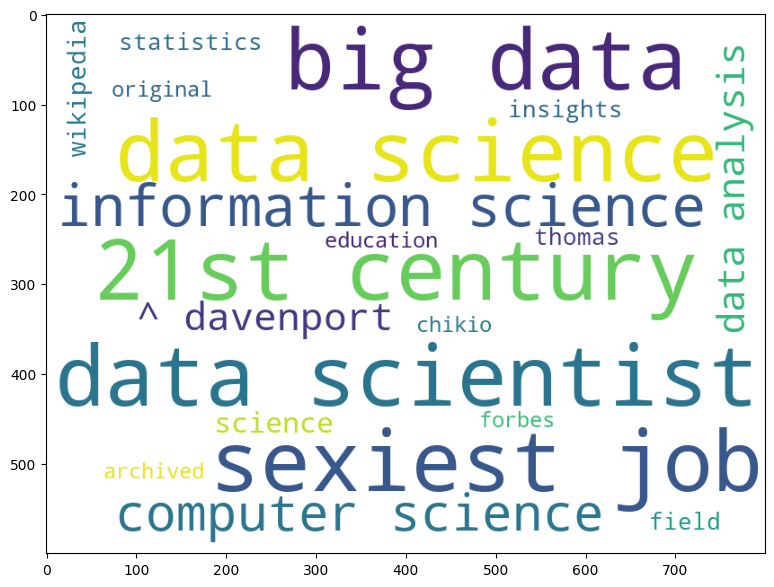

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

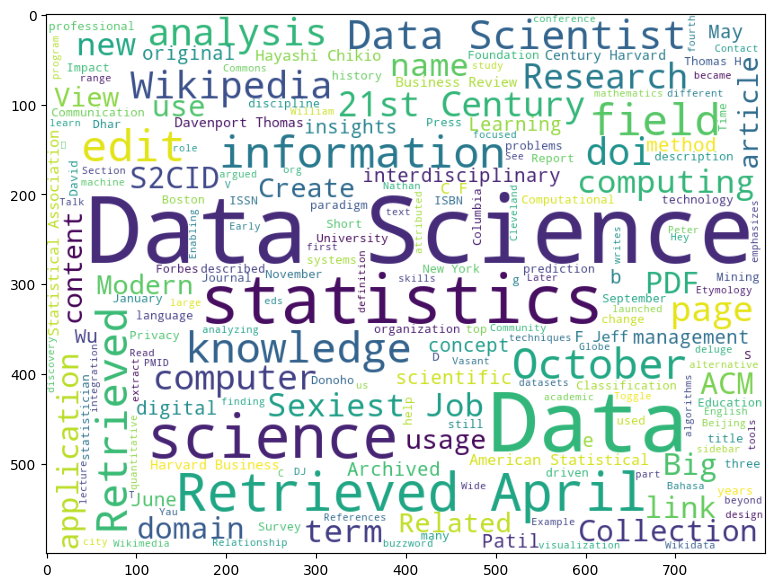

In [8]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [9]:
wc.generate(text).to_file('ds_wordcloud.png')